# Compute performance metrics for the given Y and Y_score without sklearn

In [5]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:

df_a=pd.read_csv('/content/drive/MyDrive/5_Performance_metrics/5_a.csv')
print(df_a.head(10))
print(len(df_a['proba']))

     y     proba
0  1.0  0.637387
1  1.0  0.635165
2  1.0  0.766586
3  1.0  0.724564
4  1.0  0.889199
5  1.0  0.601600
6  1.0  0.666323
7  1.0  0.567012
8  1.0  0.650230
9  1.0  0.829346
10100


In [15]:
# write your code here for task A
from tqdm import tqdm
def parameter_cal(df, threshold):
  y_cap = []
  for prob in df.iloc[:,1]:
    if prob >= threshold:
      y_cap.append(1)
      
    else:
      y_cap.append(0)
      
  df['y_cap'] = y_cap
 
  TN, FN, FP, TP  = (0,0,0,0)
  idx_0 = list(df[df['y'] == 0.0].index.values)
  idx_1 = list(df[df['y'] == 1.0].index.values)

  for idx in idx_0:
    if df.iloc[idx,2] == 0:
      TN += 1
    else:
      FP += 1

  for idx in idx_1:
    if df.iloc[idx, 2] == 0:
      FN += 1
    else: 
      TP +=1 
  
  return TN, FP, FN, TP

performance metrics for the given data 5_a.csv

1) Confusion matrix parameters: 
TN = 0
FN = 0
FP = 100
TP = 10000

2) F1-score: 0.9950248756218906
         y     proba  y_cap
0      1.0  0.899965      1
1      1.0  0.899828      1
2      1.0  0.899825      1
3      1.0  0.899812      1
4      1.0  0.899768      1
...    ...       ...    ...
10095  1.0  0.500081      1
10096  1.0  0.500058      1
10097  1.0  0.500058      1
10098  1.0  0.500047      1
10099  1.0  0.500019      1

[10100 rows x 3 columns]


100%|██████████| 10100/10100 [00:48<00:00, 206.64it/s]


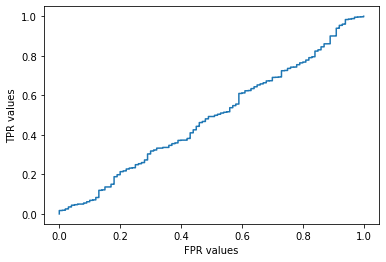


3) AUC score: 0.4882989999999999

4) Accuracy Score: 0.9900990099009901


In [16]:
import matplotlib.pyplot as plt
from tqdm import tqdm

TN, FP, FN, TP = parameter_cal(df_a, 0.5)

print('performance metrics for the given data 5_a.csv\n')
print('1) Confusion matrix parameters: \nTN = {}\nFN = {}\nFP = {}\nTP = {}'.format(TN,FN,FP,TP))

precision = TP/(TP + FP)
recall = TP/(TP + FN)

f1_score = 2*precision*recall/(precision + recall)
print('\n2) F1-score: {}'.format(f1_score))

df_a.sort_values(by = 'proba', inplace = True, ascending = False)
df_a_copy = df_a.reset_index( drop = True, inplace = False)
#print(df_a_copy)

idx_y0 = []
idx_y0 = list(df_a_copy[df_a_copy['y'] == 0.0].index.values)

idx_y1 = []
idx_y1 = list(df_a_copy[df_a_copy['y'] == 1.0].index.values)

TPR_lst = []
FPR_lst = []


for i in tqdm(range(0,len(df_a_copy['proba']))):
  lst_TN = []
  lst_FN = []
  lst_FP = []
  lst_TP = []
  TN, FN, FP, TP  = (0,0,0,0)
  
  df_a_copy.iloc[0: (i + 1) , 2] = 1
  df_a_copy.iloc[(i + 1): , 2] = 0
  
  idx_ycap0 = []
  idx_ycap0 = list(df_a_copy[df_a_copy['y_cap'] == 0].index.values)
  
  set_y0 = set(idx_y0)
  set_ycap0 = set(idx_ycap0)
  if (set_y0 & set_ycap0):
    lst_TN = list(set_y0 & set_ycap0)
  
  idx_ycap1 = []
  idx_ycap1 = list(df_a_copy[df_a_copy['y_cap'] == 1].index.values)

  set_ycap1 = set(idx_ycap1)
  if (set_y0 & set_ycap1):
    lst_FP = list(set_y0 & set_ycap1)

  set_y1 = set(idx_y1)
  if (set_y1 & set_ycap0):
    lst_FN = list(set_y1 & set_ycap0)

  if (set_y1 & set_ycap1):
    lst_TP = list(set_y1 & set_ycap1)

  TN = len(lst_TN)
  FP = len(lst_FP)
  FN = len(lst_FN)
  TP = len(lst_TP)
  
  e = 0.0000000000000111
  TPR = TP/(TP+FN+e)
  FPR = FP/(FP+TN+e)
  TPR_lst.append(TPR)
  FPR_lst.append(FPR)

plt.plot(FPR_lst, TPR_lst)
plt.ylabel('TPR values')
plt.xlabel('FPR values')
plt.show()

AUC_score =  np.trapz(np.array(TPR_lst), np.array(FPR_lst))
print('\n3) AUC score: {}'.format(AUC_score))

acc_score = (TN + TP)/(TN+TP+FN+FP)
print('\n4) Accuracy Score: {}'.format(acc_score))




## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [22]:
df_b=pd.read_csv('/content/drive/MyDrive/5_Performance_metrics/5_b.csv')
print(df_b.head(10))

     y     proba
0  0.0  0.281035
1  0.0  0.465152
2  0.0  0.352793
3  0.0  0.157818
4  0.0  0.276648
5  0.0  0.190260
6  0.0  0.320328
7  0.0  0.435013
8  0.0  0.284849
9  0.0  0.427919


In [23]:
# write your code here for task B
from tqdm import tqdm
def parameter_cal(df, threshold):
  y_cap = []
  for prob in df.iloc[:,1]:
    if prob >= threshold:
      y_cap.append(1)
      
    else:
      y_cap.append(0)
      
  df['y_cap'] = y_cap
  
  TN, FN, FP, TP  = (0,0,0,0)
  idx_0 = list(df[df['y'] == 0.0].index.values)
  idx_1 = list(df[df['y'] == 1.0].index.values)

  for idx in idx_0:
    if df.iloc[idx,2] == 0:
      TN += 1
    else:
      FP += 1

  for idx in idx_1:
    if df.iloc[idx, 2] == 0:
      FN += 1
    else: 
      TP +=1 
  
  return TN, FP, FN, TP

performance metrics for the given data 5_b.csv

1) Confusion matrix parameters: 
TN = 9761
FN = 45
FP = 239
TP = 55

2) F1-score: 0.2791878172588833
         y     proba  y_cap
0      1.0  0.595294      1
1      1.0  0.594808      1
2      1.0  0.592198      1
3      1.0  0.590171      1
4      1.0  0.588718      1
...    ...       ...    ...
10095  0.0  0.100230      0
10096  0.0  0.100189      0
10097  0.0  0.100165      0
10098  0.0  0.100161      0
10099  0.0  0.100001      0

[10100 rows x 3 columns]


100%|██████████| 10100/10100 [00:52<00:00, 193.38it/s]


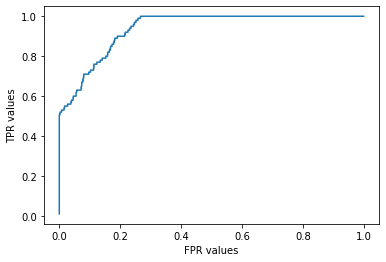


3) AUC score: 0.9377569999999998

4) Accuracy Score: 0.009900990099009901


In [24]:
import matplotlib.pyplot as plt
from tqdm import tqdm

TN, FP, FN, TP = parameter_cal(df_b, 0.5)

print('performance metrics for the given data 5_b.csv\n')
print('1) Confusion matrix parameters: \nTN = {}\nFN = {}\nFP = {}\nTP = {}'.format(TN,FN,FP,TP))

precision = TP/(TP + FP)
recall = TP/(TP + FN)

f1_score = 2*precision*recall/(precision + recall)
print('\n2) F1-score: {}'.format(f1_score))

df_b.sort_values(by = 'proba', inplace = True, ascending = False)
df_b_copy = df_b.reset_index( drop = True, inplace = False)
#print(df_b_copy)

idx_y0 = []
idx_y0 = list(df_b_copy[df_b_copy['y'] == 0.0].index.values)

idx_y1 = []
idx_y1 = list(df_b_copy[df_b_copy['y'] == 1.0].index.values)

TPR_lst = []
FPR_lst = []


for i in tqdm(range(0,len(df_b_copy['proba']))):
  lst_TN = []
  lst_FN = []
  lst_FP = []
  lst_TP = []
  TN, FN, FP, TP  = (0,0,0,0)
  
  df_b_copy.iloc[0: (i + 1) , 2] = 1
  df_b_copy.iloc[(i + 1): , 2] = 0
  
  idx_ycap0 = []
  idx_ycap0 = list(df_b_copy[df_b_copy['y_cap'] == 0].index.values)
  
  set_y0 = set(idx_y0)
  set_ycap0 = set(idx_ycap0)
  if (set_y0 & set_ycap0):
    lst_TN = list(set_y0 & set_ycap0)
  
  idx_ycap1 = []
  idx_ycap1 = list(df_b_copy[df_b_copy['y_cap'] == 1].index.values)

  set_ycap1 = set(idx_ycap1)
  if (set_y0 & set_ycap1):
    lst_FP = list(set_y0 & set_ycap1)

  set_y1 = set(idx_y1)
  if (set_y1 & set_ycap0):
    lst_FN = list(set_y1 & set_ycap0)

  if (set_y1 & set_ycap1):
    lst_TP = list(set_y1 & set_ycap1)

  TN = len(lst_TN)
  FP = len(lst_FP)
  FN = len(lst_FN)
  TP = len(lst_TP)
  
  e = 0.0000000000000111
  TPR = TP/(TP+FN+e)
  FPR = FP/(FP+TN+e)
  TPR_lst.append(TPR)
  FPR_lst.append(FPR)

plt.plot(FPR_lst, TPR_lst)
plt.ylabel('TPR values')
plt.xlabel('FPR values')
plt.show()

AUC_score =  np.trapz(np.array(TPR_lst), np.array(FPR_lst))
print('\n3) AUC score: {}'.format(AUC_score))

acc_score = (TN + TP)/(TN+TP+FN+FP)
print('\n4) Accuracy Score: {}'.format(acc_score))

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [34]:
df_c=pd.read_csv('/content/drive/MyDrive/5_Performance_metrics/5_c.csv')
print(df_c.head(10))

   y      prob
0  0  0.458521
1  0  0.505037
2  0  0.418652
3  0  0.412057
4  0  0.375579
5  0  0.595387
6  0  0.370288
7  0  0.299273
8  0  0.297000
9  0  0.266479


In [35]:
import matplotlib.pyplot as plt
from tqdm import tqdm

y_cap = []
for j in range(0, len(df_c['y'])):
   y_cap.append(0)

df_c['y_cap'] = y_cap

df_c.sort_values(by = 'prob', inplace = True, ascending = False)
df_c_copy = df_c.reset_index( drop = True, inplace = False)

idx_y0 = []
idx_y0 = list(df_c_copy[df_c_copy['y'] == 0].index.values)

idx_y1 = []
idx_y1 = list(df_c_copy[df_c_copy['y'] == 1].index.values)

A_dict = dict()

for i in tqdm(range(0,len(df_c_copy['prob']))):
  lst_TN = []
  lst_FN = []
  lst_FP = []
  lst_TP = []
  TN, FN, FP, TP  = (0,0,0,0)
  
  df_c_copy.iloc[0: (i + 1) , 2] = 1
  df_c_copy.iloc[(i + 1): , 2] = 0
  
  idx_ycap0 = []
  idx_ycap0 = list(df_c_copy[df_c_copy['y_cap'] == 0].index.values)
  
  set_y0 = set(idx_y0)
  set_ycap0 = set(idx_ycap0)
  if (set_y0 & set_ycap0):
    lst_TN = list(set_y0 & set_ycap0)
  
  idx_ycap1 = []
  idx_ycap1 = list(df_c_copy[df_c_copy['y_cap'] == 1].index.values)

  set_ycap1 = set(idx_ycap1)
  if (set_y0 & set_ycap1):
    lst_FP = list(set_y0 & set_ycap1)

  set_y1 = set(idx_y1)
  if (set_y1 & set_ycap0):
    lst_FN = list(set_y1 & set_ycap0)

  if (set_y1 & set_ycap1):
    lst_TP = list(set_y1 & set_ycap1)

  TN = len(lst_TN)
  FP = len(lst_FP)
  FN = len(lst_FN)
  TP = len(lst_TP)
  
  A_value = 500*FN + 100*FP
  A_dict[A_value] = i
  
keys = sorted(A_dict.keys())
A_min = A_dict[keys[0]]
print('\nBest threshold of probability value is:', df_c_copy.iloc[A_min, 1])

      y      prob  y_cap
0     1  0.957747      0
1     1  0.951437      0
2     1  0.948638      0
3     1  0.944094      0
4     1  0.941113      0
...  ..       ...    ...
2847  0  0.031114      0
2848  0  0.030269      0
2849  0  0.028964      0
2850  0  0.028396      0
2851  0  0.028038      0

[2852 rows x 3 columns]


100%|██████████| 2852/2852 [00:06<00:00, 418.53it/s]


Best threshold of probability value is: 0.2300390278970873



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [36]:
df_d=pd.read_csv('/content/drive/MyDrive/5_Performance_metrics/5_d.csv')
print(df_d.head(10))

       y   pred
0  101.0  100.0
1  120.0  100.0
2  131.0  113.0
3  164.0  125.0
4  154.0  152.0
5  133.0  153.0
6  148.0  139.0
7  172.0  145.0
8  153.0  162.0
9  162.0  154.0


In [40]:
 # write your code for task 5d
sum_1 = 0
sum_2 = 0
sum_3 = 0
n = len(df_d['y'])
for i in range(0, n):
  sum_1 += (df_d.iloc[i,0] - df_d.iloc[i, 1])**2
  sum_2 += abs(df_d.iloc[i,0] - df_d.iloc[i,1])
  sum_3 += df_d.iloc[i,0]

MSE = sum_1/n
print('Mean Square Error:',MSE)

MAPE = sum_2/sum_3
print('Mean Absolute Percentage error:',MAPE*100)

SS_tot = 0
for i in range(0, len(df_d['y'])):
  SS_tot += (df_d.iloc[i,0] - sum_3/n)**2 

R_square = 1 - sum_1/SS_tot
print('R-square error:', R_square)

Mean Square Error: 177.16569974554707
Mean Absolute Percentage error: 12.91202994009687
R-square error: 0.9563582786990964
